In [1]:
import torch

In [2]:
words = open('names.txt').read().splitlines()
words

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn',
 'abigail',
 'emily',
 'elizabeth',
 'mila',
 'ella',
 'avery',
 'sofia',
 'camila',
 'aria',
 'scarlett',
 'victoria',
 'madison',
 'luna',
 'grace',
 'chloe',
 'penelope',
 'layla',
 'riley',
 'zoey',
 'nora',
 'lily',
 'eleanor',
 'hannah',
 'lillian',
 'addison',
 'aubrey',
 'ellie',
 'stella',
 'natalie',
 'zoe',
 'leah',
 'hazel',
 'violet',
 'aurora',
 'savannah',
 'audrey',
 'brooklyn',
 'bella',
 'claire',
 'skylar',
 'lucy',
 'paisley',
 'everly',
 'anna',
 'caroline',
 'nova',
 'genesis',
 'emilia',
 'kennedy',
 'samantha',
 'maya',
 'willow',
 'kinsley',
 'naomi',
 'aaliyah',
 'elena',
 'sarah',
 'ariana',
 'allison',
 'gabriella',
 'alice',
 'madelyn',
 'cora',
 'ruby',
 'eva',
 'serenity',
 'autumn',
 'adeline',
 'hailey',
 'gianna',
 'valentina',
 'isla',
 'eliana',
 'quinn',
 'nevaeh',
 'ivy',
 'sadie',
 'piper',
 'lydia',
 'alexa',
 'josephine',
 'emery',
 'julia'

In [3]:
chars = set(''.join(words))
chars 

{'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

In [4]:
stoi = {c: i +1 for i,c in enumerate(chars)}
stoi['.'] = 0
itos = {i: c for c, i in stoi.items()}
stoi.items(), itos.items()

(dict_items([('f', 1), ('t', 2), ('c', 3), ('k', 4), ('g', 5), ('d', 6), ('h', 7), ('r', 8), ('y', 9), ('p', 10), ('o', 11), ('u', 12), ('n', 13), ('q', 14), ('i', 15), ('s', 16), ('z', 17), ('m', 18), ('b', 19), ('x', 20), ('a', 21), ('v', 22), ('l', 23), ('w', 24), ('j', 25), ('e', 26), ('.', 0)]),
 dict_items([(1, 'f'), (2, 't'), (3, 'c'), (4, 'k'), (5, 'g'), (6, 'd'), (7, 'h'), (8, 'r'), (9, 'y'), (10, 'p'), (11, 'o'), (12, 'u'), (13, 'n'), (14, 'q'), (15, 'i'), (16, 's'), (17, 'z'), (18, 'm'), (19, 'b'), (20, 'x'), (21, 'a'), (22, 'v'), (23, 'l'), (24, 'w'), (25, 'j'), (26, 'e'), (0, '.')]))

In [5]:
xs , ys = [], [] 

for w in words :
    chs = ['.'] + list(w) + ['.']
    for ch1 , ch2 in zip(chs, chs[1:]):
        xs.append(stoi[ch1])
        ys.append(stoi[ch2])
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)

xs[0:10], ys[:10]   

(tensor([ 0, 26, 18, 18, 21,  0, 11, 23, 15, 22]),
 tensor([26, 18, 18, 21,  0, 11, 23, 15, 22, 15]))

In [6]:
# we dont send the indexes to the model directly, we need to convert them to one-hot vectors


(<matplotlib.image.AxesImage at 0x7b5230b1a720>,
 torch.Size([228146, 27]),
 torch.float32)

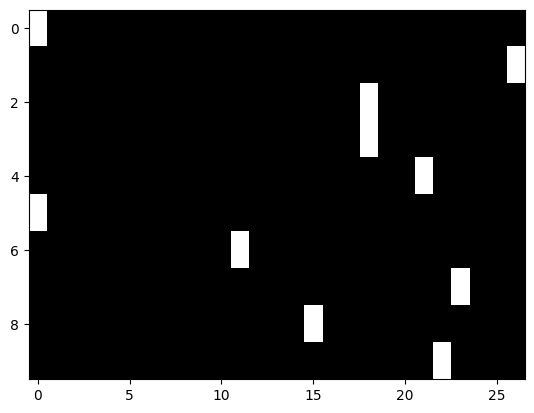

In [7]:
import torch.nn.functional as F
import matplotlib.pyplot as plt
xenc= F.one_hot(xs, num_classes=27).float()

plt.imshow(xenc[:10], cmap='gray', aspect='auto'),xenc.shape, xenc.dtype

In [8]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
W = torch.randn((27, 27),generator=g,requires_grad=True) # each column is weights for a neuron 
multiplied = xenc @ W # matrix multiplication
multiplied.shape, multiplied.dtype , multiplied[3][13], xenc[3]@ W[:,13] # this is the activation of the 14th neuron for the 4th input 
# for the 4th input what is the activation of the 14th neuron
 

(torch.Size([228146, 27]),
 torch.float32,
 tensor(1.1614, grad_fn=<SelectBackward0>),
 tensor(1.1614, grad_fn=<DotBackward0>))

# Understanding Logits in Neural Networks

Logits are the raw output values from a neural network layer before applying an activation function like softmax. In this notebook, we calculate logits as:

```
multiplied = xenc @ W  # matrix multiplication
```

Where:
- `xenc` is a one-hot encoded representation of our input characters (shape: [n_samples, 27])
- `W` is our weight matrix (shape: [27, 27])
- `multiplied` contains the logits (shape: [n_samples, 27])

Each row in the logits matrix represents the unnormalized scores for each possible next character. The higher the logit value, the more likely that character is predicted to follow the input character.

To convert these logits into probabilities, we would typically apply the softmax function:

```
probs = softmax(logits)  # transforms logits to probabilities that sum to 1
```

The highest logit will correspond to the model's prediction for the next character in the sequence.

## Relationship Between Logits and Counts

In this notebook, we compute the exponentiated logits:

```
counts = logits.exp()
```

This exponential transformation is the first step of the softmax function. The exponential ensures all values are positive and amplifies differences between logits - larger logits produce exponentially larger counts.

The full softmax would normalize these counts to obtain probabilities:
```
probs = counts / counts.sum(dim=1, keepdim=True)
```

Why this matters:
- Exponentiating preserves the ranking of predictions (highest logit → highest probability)
- It transforms unbounded logits (-∞ to +∞) to strictly positive values
- The relative magnitudes between counts directly reflect the model's confidence
- Without normalization, counts can exceed 1 and don't sum to 1
- After normalization, we get a proper probability distribution over all possible next characters

In [31]:
logits = xenc @ W # log counts for each next character
counts = logits.exp() # convert to counts more like N matrix which has showing how many times each character appears as next character of a particular character
probs = counts / counts.sum(1, keepdim=True) # convert to probabilities
probs.sum(1, keepdim=True) # check that the probabilities sum to 1 
# the above one is the softmax function
loss = -(probs[torch.arange(len(xs)), ys]).log().mean() # negative log likelihood loss
probs.shape,loss

(torch.Size([228146, 27]), tensor(3.7159, grad_fn=<NegBackward0>))

In [10]:
xenc[0], probs[0] # for the first input, what is the one-hot encoding and what are the probabilities of each character being next character

(tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
         0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
         0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
        grad_fn=<SelectBackward0>))

In [11]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,26)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
       grad_fn=<SelectBackward0>)
label (actual next character): 26
probability assigned by the net to the the correct character: 0.14589925110340118
log likelihood: -1.9248390197753906
negative log likelihood: 1.9248390197753906
--------
bigram example 2: em (indexes 26,18)
input to the neural net: 26
output probabilities from the neural net: tensor([0.0634, 0.0270, 0.0101, 0.0040, 0.0188, 0.0129, 0.0115, 0.0283, 0.0220,
        0.0805, 0.0116, 0.0218, 0.0112, 0.0253, 0.0204, 0.0370, 0.0389, 0.0270,
        0.0548, 0.0370, 0.0471, 0.0335, 0.0307, 0.1727, 0.0833, 0.0175, 0.0517],
       grad_fn=<SelectBackward0>)
label (actual next chara

In [12]:
loss = -probs[torch.arange(5), ys[:5]].log().mean() # this is the same as above, but using the probabilities directly
loss

tensor(3.5358, grad_fn=<NegBackward0>)

In [28]:
# backpropagation
W.grad = None # reset the gradients
loss.backward() # compute the gradients

In [29]:
W.grad,W.grad.shape # these are the gradients of the loss with respect to the weights

(tensor([[ 8.5078e-03, -4.2405e-04, -4.0004e-03, -6.1661e-03, -1.0614e-02,
          -1.2045e-03, -7.0281e-03, -5.7299e-04, -5.2561e-03,  2.0485e-03,
          -1.1462e-03,  2.1785e-03,  9.3922e-04, -3.8680e-03,  6.6054e-03,
           3.0493e-02, -5.3154e-04, -3.7216e-03, -7.6176e-03, -4.9556e-03,
           4.1710e-03, -1.7790e-02, -1.2426e-03, -4.1025e-03,  3.1220e-04,
           1.0884e-02,  1.4103e-02],
         [-2.9123e-04, -1.5857e-04,  7.8336e-05,  3.9729e-05,  2.3160e-04,
           1.1782e-04,  4.3009e-04,  4.7676e-05, -4.5007e-04, -4.2299e-05,
           4.0619e-04, -2.2890e-04,  3.4807e-04,  2.6715e-05,  9.2062e-05,
          -6.1928e-04,  1.3561e-04,  2.2059e-05,  3.5672e-04,  2.1081e-04,
           1.8365e-04, -9.3814e-04,  2.0380e-05,  4.2682e-05,  2.4170e-04,
           1.9946e-04, -5.0289e-04],
         [-1.5096e-03,  1.8388e-04, -8.7284e-04,  7.6651e-04,  2.1086e-04,
           2.3070e-04,  5.9970e-04, -2.4116e-03, -1.3577e-03, -1.3819e-03,
           1.3376e-03, -2.

In [30]:
W.data += -0.1 * W.grad # update the weights using gradient descent

In [32]:
loss.item()

3.7159416675567627

In [43]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


## Regularization: Intuitive and Mathematical Explanation

**Intuitive Explanation**

Regularization is a technique used to prevent overfitting in machine learning models. Overfitting happens when a model learns the training data too well, including its noise and outliers, which hurts its performance on new, unseen data. Regularization discourages the model from fitting the noise by adding a penalty for large or complex weights, encouraging simpler models that generalize better.

Think of regularization as a way to "smooth out" the model, making it less sensitive to small fluctuations in the training data.

**Mathematical Explanation**

In this notebook, regularization is added to the loss function as follows:

\[
\text{loss} = -\frac{1}{N} \sum_{i=1}^N \log p_{i, y_i} + \lambda \|W\|^2
\]

- The first term is the average negative log likelihood (cross-entropy loss).
- The second term, \(\lambda \|W\|^2\), is the regularization penalty (L2 regularization), where:
    - \(W\) is the weight matrix,
    - \(\|W\|^2\) is the sum of the squares of all weights,
    - \(\lambda\) (e.g., 0.01) controls the strength of the penalty.

This penalty discourages large weights, making the model less likely to overfit. The higher the value of \(\lambda\), the stronger the regularization effect.

**Summary Table**

| Term in Loss Function                | Purpose                                 |
|--------------------------------------|-----------------------------------------|
| \(-\log p_{i, y_i}\)                 | Fit the data (maximize likelihood)      |
| \(+\lambda \|W\|^2\)                 | Penalize large weights (regularization) |

Regularization helps the model generalize better by balancing fit and simplicity.

In [ ]:
# gradient descent
for k in range(150):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  # W is more like N matrix  and we make this W using loss function backward # 
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean() # 0.01 is like regularization strength, this is the loss function we want to minimize
  
  
  # in the bigram model we used +1 to smooth the counts , as N and W are analogous to the bigram counts and W is more like N matrix, we use regularization to avoid overfitting
  # we use regularization to avoid overfitting, this is equivalent to adding +1 to the counts in the bigram model
  # 0.01 is the regularization strength, you can change it to see how it affects the loss
  # w wants to be small or zero if w is zero then the probs  # will be close to uniform distribution
  
  
  # remember 
  # we used regularization to avoid overfitting 
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

3.7292466163635254
3.3365888595581055
3.132108211517334
3.0035903453826904
2.9103708267211914
2.8404126167297363
2.787395477294922
2.746760845184326
2.7151215076446533
2.6899852752685547
2.6695570945739746
2.6525814533233643
2.638195514678955
2.6258041858673096
2.6149933338165283
2.6054677963256836
2.5970101356506348
2.5894556045532227
2.5826752185821533
2.5765647888183594
2.571037530899048
2.5660204887390137
2.5614521503448486
2.5572783946990967
2.5534534454345703
2.5499372482299805
2.546696424484253
2.5436995029449463
2.5409226417541504
2.538342237472534
2.5359387397766113
2.5336954593658447
2.53159761428833
2.5296313762664795
2.5277862548828125
2.5260508060455322
2.52441668510437
2.5228753089904785
2.5214195251464844
2.5200419425964355
2.518737316131592
2.517500162124634
2.5163252353668213
2.5152082443237305
2.5141453742980957
2.513132333755493
2.5121660232543945
2.5112433433532715
2.5103611946105957
2.5095174312591553
2.508709669113159
2.5079352855682373
2.5071921348571777
2.506479

In [45]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

kewen.
einion.
oliseolirannneynn.
cayliuhavo.
or.
